## This notebook is for decoder based analysis of the game data for preparing the pilot experiment

In [1]:
# import libraries
import sys
sys.path.insert(0,'/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/PilotExperiment/BrainMachineInterfaces_pilotExperiment')
from DataAnalysis.dataAnalysisClasses import *
import matplotlib.pyplot as plt

In [51]:
# Retrieve training and test data

dataProcessor = ProcessData('../GameSaves/Ashwin_09_01__17_05_10mins_updated.pkl','../GameSaves/Ashwin_09_01__17_20_90s_updated.pkl')
dataProcessor.retrieveTrainingFeatureData(rigidBodyGroup= "B")
dataProcessor.retrieveTestFeatureData(rigidBodyGroup="B")
print("Program successfully executed")

Program successfully executed


In [52]:
# Normalise training and test data
dataProcessor.retrieveTestOutputs()
dataProcessor.retrieveTrainingOutputs()

dataProcessor.normaliseDatasets(byVariance=False,delCalibrationData=True)
print(dataProcessor.outputTrainingData.shape,dataProcessor.featureTrainingData.shape)




(17008, 2) (17008, 6)


In [53]:
dataProcessor.performLinearRegression()
dataProcessor.gatherPredictions()
dataProcessor.exportPredictions(fileName= "../CursorPredictors/Ashwin_09_01_rigidBodyB.npz")



0.12594392160930734
[[-0.12265409 -0.25877378 -0.20611642 -0.36484076 -0.55302878 -0.54393083]
 [-0.12979794 -0.25423219 -0.21739122 -0.38946749 -0.54022729 -0.56946888]
 [-0.13627788 -0.24993719 -0.22744592 -0.41124701 -0.52882759 -0.5904201 ]
 ...
 [ 0.02638472 -0.1678857   0.12942369  0.00749408 -0.55935281  0.2173763 ]
 [ 0.02210259 -0.16743936  0.11861674  0.03542863 -0.53021842  0.20919293]
 [ 0.01883259 -0.16805506  0.10676182  0.00728017 -0.56644355  0.1632841 ]] [[ 1.55032488e+00  1.38046790e+01]
 [ 1.61589146e+00  1.36183267e+01]
 [ 1.42219724e+00  1.34063744e+01]
 [ 1.15274603e+00  1.32793179e+01]
 [ 7.85871235e-01  1.32238863e+01]
 [ 3.80722717e-01  1.32366873e+01]
 [ 4.68285860e-02  1.31730882e+01]
 [-2.65961350e-01  1.31204374e+01]
 [-5.77954197e-01  1.30171975e+01]
 [-8.24352120e-01  1.28632009e+01]
 [-1.11029746e+00  1.26154540e+01]
 [-1.23428508e+00  1.23563005e+01]
 [-1.22247978e+00  1.20795800e+01]
 [-1.07160147e+00  1.17623185e+01]
 [-8.11277976e-01  1.13838182e+01]

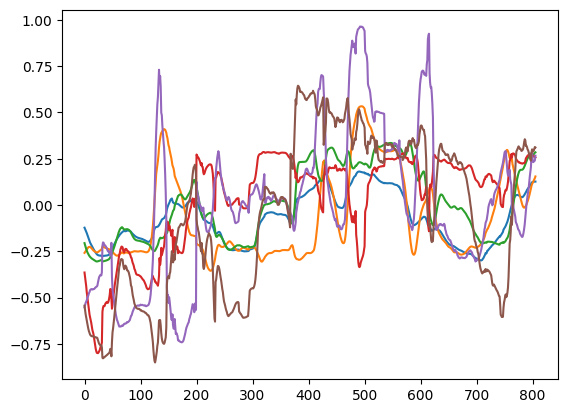

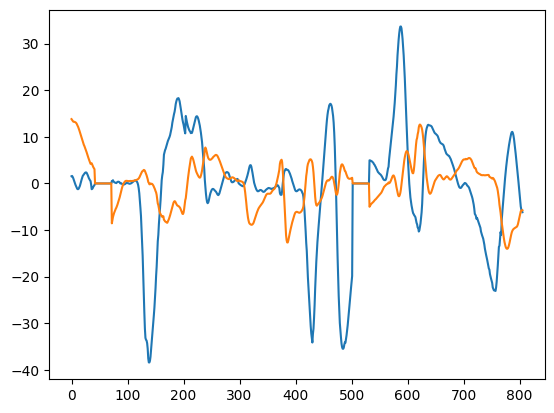

In [54]:
score = dataProcessor.reg.score(dataProcessor.featureTestData,dataProcessor.outputTestData)
print(score)
print(dataProcessor.featureTestData[1000:1200,:],dataProcessor.outputTestData[1000:1200])
plt.plot(dataProcessor.featureTestData[1000:2000,:])
plt.show()
plt.plot(dataProcessor.outputTestData[1000:2000,:])
plt.show()



[[ 0.15621996 -0.98720926  0.03183074]]
[[ 0.19726891 -0.05048038  0.97904888]]


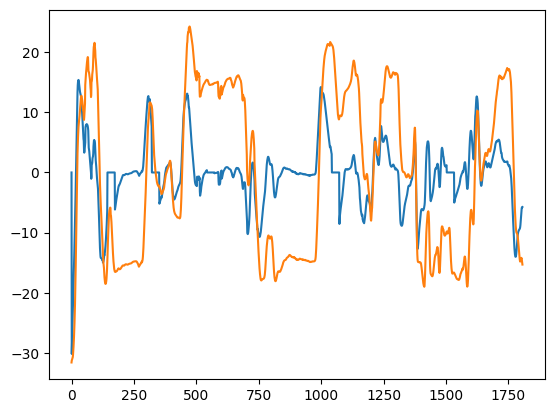

In [58]:
print(dataProcessor.testDataGameEngine.pcaleftRight.components_)
print(dataProcessor.testDataGameEngine.pcaUpDown.components_)
# retrieve cal matrix
calMatrix = dataProcessor.testDataGameEngine.calibrationMatrix
controlData = dataProcessor.testDataGameEngine.controlRigidBodyDatastore

# calibrated
controlData_calibrated = np.matmul(calMatrix,controlData[:,:3].transpose()).transpose()

# delete calibration data
calIdx = dataProcessor.testFinalCalibrationIdx
controlData_calibrated = controlData_calibrated[calIdx+1:]
controlData_calibrated.shape # shape 1877 x 3

# fetch list of velocities
velocityData = dataProcessor.testDataGameEngine.cursorVelocityWriteDatastore
velocityData.shape # shape 1877 x 2

# now cal velocities from control Data
calcVelocitiesX = dataProcessor.testDataGameEngine.pcaleftRight.transform(controlData_calibrated)
calcVelocitiesX.shape

calcVelocitiesY = dataProcessor.testDataGameEngine.pcaUpDown.transform(controlData_calibrated)



cursor = dataProcessor.testDataGameEngine.cursor

if cursor.xInvert:
    normalised_x_val = 1 -  (  calcVelocitiesX - cursor.userMinXValue) / cursor.xRange
else:
    normalised_x_val =   (calcVelocitiesX - cursor.userMinXValue) / cursor.xRange
if cursor.yInvert:
    normalised_y_Val = ( calcVelocitiesY - cursor.userMinYValue) / cursor.yRange
else:  
    normalised_y_Val = 1 - (calcVelocitiesY - cursor.userMinYValue) / cursor.yRange


x_target = normalised_x_val * 1270
y_target = normalised_y_Val * 740

distanceX = x_target - 1270//2
distanceY = y_target - 740//2
calcVelocitiesX = distanceX * 0.06
calcVelocitiesY = distanceY * 0.06

predVels = np.zeros(velocityData.shape)
predVels[:,0] = calcVelocitiesX.reshape(-1)
predVels[:,1] = calcVelocitiesY.reshape(-1)

plt.plot(velocityData[:,1])
plt.plot(predVels[:,1])

plt.show()
plt.show()





In [56]:
cursor.xInvert
cursor.yInvert
pca_lr = dataProcessor.testDataGameEngine.pcaleftRight
pca_ud = dataProcessor.testDataGameEngine.pcaUpDown
pca_y = pca_ud.transform(np.asarray([-1.32410509, -1.74628657,  0.72892797]).reshape(1,-1))
normalised_y_Val = 1 - (pca_y - cursor.userMinYValue) / cursor.yRange
y_target = normalised_y_Val * 740
distanceY = y_target - cursorPos # need to find this
velY = distanceY * 0.06
velY
# we need an estimat eof the cursor pos to find this

NameError: name 'cursorPos' is not defined